##SISTEMA DE DETECCION DE AGUA
---
####con Series Temporales

OBJETIVOS:

1. Determinar qué características influyen en el comportamiento de cada masa de agua y, por lo tanto, son útiles para construir un conjunto de datos con base a un lago en Italia.
- Se identificaron las variables clave, como 'Flow_Rate' para 'Lake_Level' y 'Rainfall' para 'Flow_Rate', a través del análisis de correlación.

2. Qué características deben descartarse y cómo deben eliminarse.
-  Con base en el análisis de correlación, las estaciones de lluvia con correlación débil se descartaron al no incluirlas en la creación de variables lag para el modelado.

3. ¿Qué intervalo de datos es significativo para nuestro problema?
- La granularidad diaria de los datos es la más significativa y efectiva para las predicciones.

4. Resolver/descubrir hiperparámetros para pasar al modelo matemático.
- El uso de pm.auto_arima se encargó de la selección automática de los hiperparámetros óptimos para los modelos ARIMA.

5. Un cuaderno ejecutable que contiene el análisis realizado sobre los datos.
- Este cuaderno

6. Un modelo matemático que pronostica la disponibilidad hídrica de las masas de agua en términos de nivel o caudal en un intervalo de tiempo determinado del año. El intervalo de tiempo se define como día/mes, dependiendo de la unidad de tiempo con la que trabaja el modelo (por ejemplo, para un modelo con un intervalo mensual, se espera un pronóstico mensual).
- Se construyeron modelos ARIMA para pronosticar el 'Lake_Level' y 'Flow_Rate' tanto diaria como mensualmente.

7. Un procedimiento de creación del modelo a 4. Este procedimiento debe garantizar la replicabilidad
-  El proceso desde la carga hasta la evaluación, garantiza la replicabilidad del modelo.

DESAFIOS:

1. Predecir la cantidad de agua en cada masa de agua y determinar cómo las características influyen en la disponibilidad de agua de cada masa de agua presentada.
- Los modelos ARIMA predicen el 'Lake_Level' y 'Flow_Rate', mientras que el análisis de correlación muestra la influencia de las características.

2. El modelo debe capturar los volúmenes de cada masa de agua (por ejemplo, si el modelo trabaja con un intervalo mensual, se espera un pronóstico para el mes).
- Se desarrollaron modelos que capturan los volúmenes en intervalos diarios y mensuales, identificando el diario como el más preciso.

In [30]:
!pip install pmdarima

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
URL = '/content/Lake_Bilancino.csv'
df = pd.read_csv(URL)
df.head(5)

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


In [32]:
#identificamos las columnas con NaN
nan_columns = df.columns[df.isnull().any()].tolist()
nan_columns

['Rainfall_S_Piero',
 'Rainfall_Mangona',
 'Rainfall_S_Agata',
 'Rainfall_Cavallina',
 'Rainfall_Le_Croci',
 'Temperature_Le_Croci',
 'Flow_Rate']

In [33]:
#reemplazamos los valores NaN por 0
df.fillna(0, inplace=True)
df.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,0.0,0.0,0.0,0.0,0.0,0.0,249.43,0.31
1,04/06/2002,0.0,0.0,0.0,0.0,0.0,0.0,249.43,0.31
2,05/06/2002,0.0,0.0,0.0,0.0,0.0,0.0,249.43,0.31
3,06/06/2002,0.0,0.0,0.0,0.0,0.0,0.0,249.43,0.31
4,07/06/2002,0.0,0.0,0.0,0.0,0.0,0.0,249.44,0.31


In [34]:
#Convertimos 'Date' a un formato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,2002-06-03,0.0,0.0,0.0,0.0,0.0,0.0,249.43,0.31
1,2002-06-04,0.0,0.0,0.0,0.0,0.0,0.0,249.43,0.31
2,2002-06-05,0.0,0.0,0.0,0.0,0.0,0.0,249.43,0.31
3,2002-06-06,0.0,0.0,0.0,0.0,0.0,0.0,249.43,0.31
4,2002-06-07,0.0,0.0,0.0,0.0,0.0,0.0,249.44,0.31


In [35]:
#establecemos Date como indice con un condicional:
# Solo establece 'Date' como índice si aún es una columna
if 'Date' in df.columns:
    df.set_index('Date', inplace=True)
# pero si 'Date' ya es el índice, solo mostrará el DataFrame
df.head()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Date,,,,,,,,
2002-06-03,0.0,0.0,0.0,0.0,0.0,0.0,249.43,0.31
2002-06-04,0.0,0.0,0.0,0.0,0.0,0.0,249.43,0.31
2002-06-05,0.0,0.0,0.0,0.0,0.0,0.0,249.43,0.31
2002-06-06,0.0,0.0,0.0,0.0,0.0,0.0,249.43,0.31
2002-06-07,0.0,0.0,0.0,0.0,0.0,0.0,249.44,0.31


¿Que relacion tienen las lluvias y la temperatura, con el nivel del agua y el flujo de agua a lo largo del tiempo?

In [36]:
print(df.describe())
#para ver un resumen estadistico descriptivo

       Rainfall_S_Piero  Rainfall_Mangona  Rainfall_S_Agata  \
count       6603.000000       6603.000000       6603.000000   
mean           2.255278          3.048735          2.436741   
std            6.390993          8.557352          6.887712   
min            0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000   
75%            0.600000          0.800000          0.800000   
max           80.600000        110.000000        120.200000   

       Rainfall_Cavallina  Rainfall_Le_Croci  Temperature_Le_Croci  \
count         6603.000000        6603.000000           6603.000000   
mean             2.441012           2.856368             13.258231   
std              7.352554           7.717206              7.801524   
min              0.000000           0.000000             -5.350000   
25%              0.000000           0.000000              7.300000   
50%         

In [37]:
#hacemos el calculo de la matriz de correlacion entre todas las variables
correlation_matrix = df.corr()
correlation_matrix

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Rainfall_S_Piero,1.000000,0.868717,0.899085,0.909549,0.911180,-0.055112,-0.034272,0.139319
Rainfall_Mangona,0.868717,1.000000,0.867452,0.874562,0.865492,-0.055975,-0.032483,0.162430
Rainfall_S_Agata,0.899085,0.867452,1.000000,0.888862,0.882137,-0.047334,-0.032469,0.155361
Rainfall_Cavallina,0.909549,0.874562,0.888862,1.000000,0.923840,-0.054901,-0.034009,0.168752
Rainfall_Le_Croci,0.911180,0.865492,0.882137,0.923840,1.000000,-0.057088,-0.025141,0.182480
Temperature_Le_Croci,-0.055112,-0.055975,-0.047334,-0.054901,-0.057088,1.000000,0.043577,-0.150002
Lake_Level,-0.034272,-0.032483,-0.032469,-0.034009,-0.025141,0.043577,1.000000,0.297970
Flow_Rate,0.139319,0.162430,0.155361,0.168752,0.182480,-0.150002,0.297970,1.000000


Visualizamos la matriz de correlación utilizando un mapa de calor para entender mejor las relaciones entre las variables.

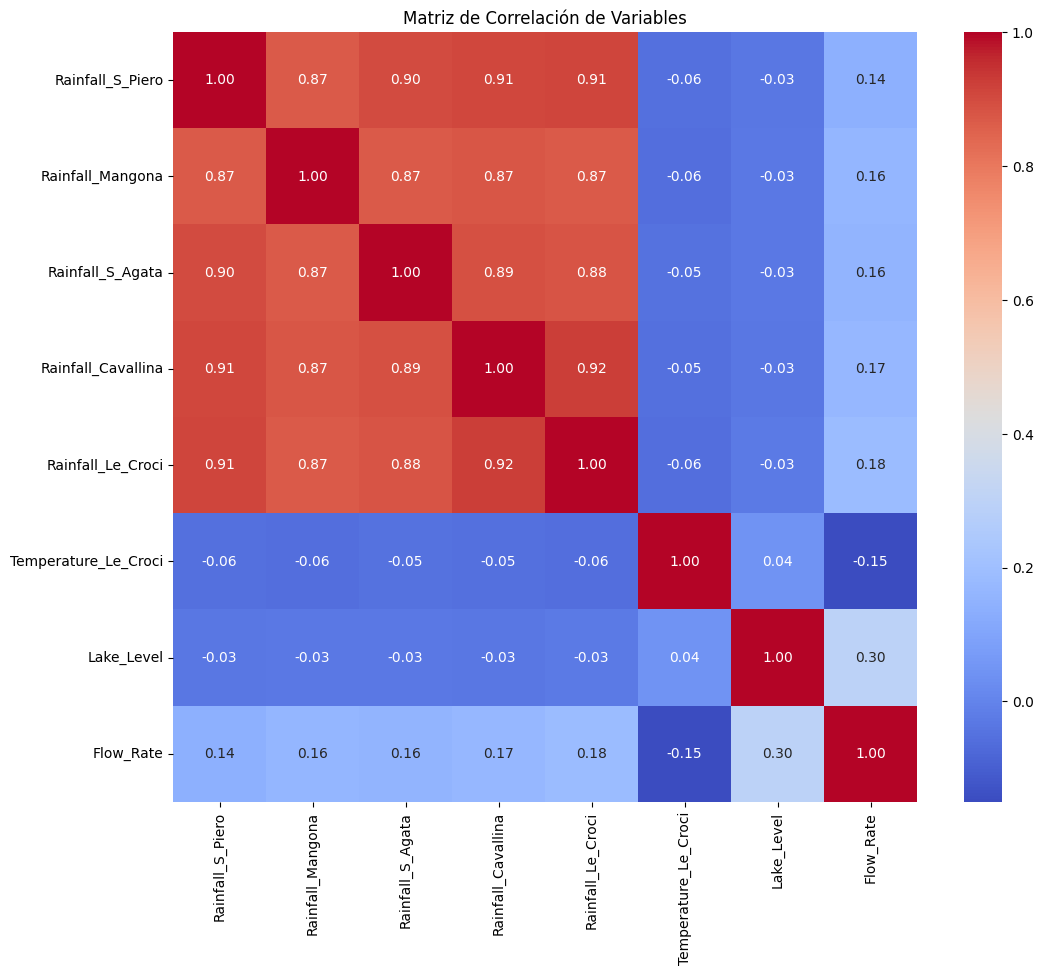

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables')
plt.show()

INTERPRETACION:

1. Los colores más cálidos indican una correlación positiva fuerte. Esto significa que cuando una variable aumenta, la otra tiende a aumentar también.

2. Los colores más fríos indican una correlación negativa fuerte. Esto significa que cuando una variable aumenta, la otra tiende a disminuir.

3. Los colores cercanos al blanco o gris (cerca a 0) indican una correlación débil o nula.

4. Los números dentro de cada celda son el coeficiente de correlación de Pearson, que va de -1 a +1.
- +1 = correlación positiva perfecta
- -1 = correlación negativa perfecta
- 0 = no hay una relación lineal entre las variables.

CONCLUSION:

1. La columna 'Lake_Level' muestra que sus correlaciones con las variables de 'Rainfall' y 'Temperature_Le_Croci' son muy bajas y cercanas a cero.

- Esto significa que la lluvia y/o la temperatura diaria no tienen un impacto lineal fuerte e inmediato en el nivel del lago.

- Pero, si tiene una correlación positiva moderada con 'Flow_Rate' (alrededor de 0.297), lo cual es lógico ya que un mayor nivel de agua puede influir en el caudal de salida.
----
2. La columna 'Flow_Rate' muestra que hay correlaciones positivas moderadas con las variables de 'Rainfall' (por ejemplo, 'Rainfall_Le_Croci' es de alrededor 0.182).
- Esto indica que a más lluvia, tiende a haber un mayor caudal, lo cual es esperable.

- Tambien presenta una correlación negativa moderada con 'Temperature_Le_Croci' (alrededor de -0.150). Esto podría significar que temperaturas más altas tienden a reducir el caudal.

----
### Visualización de Series Temporales clave


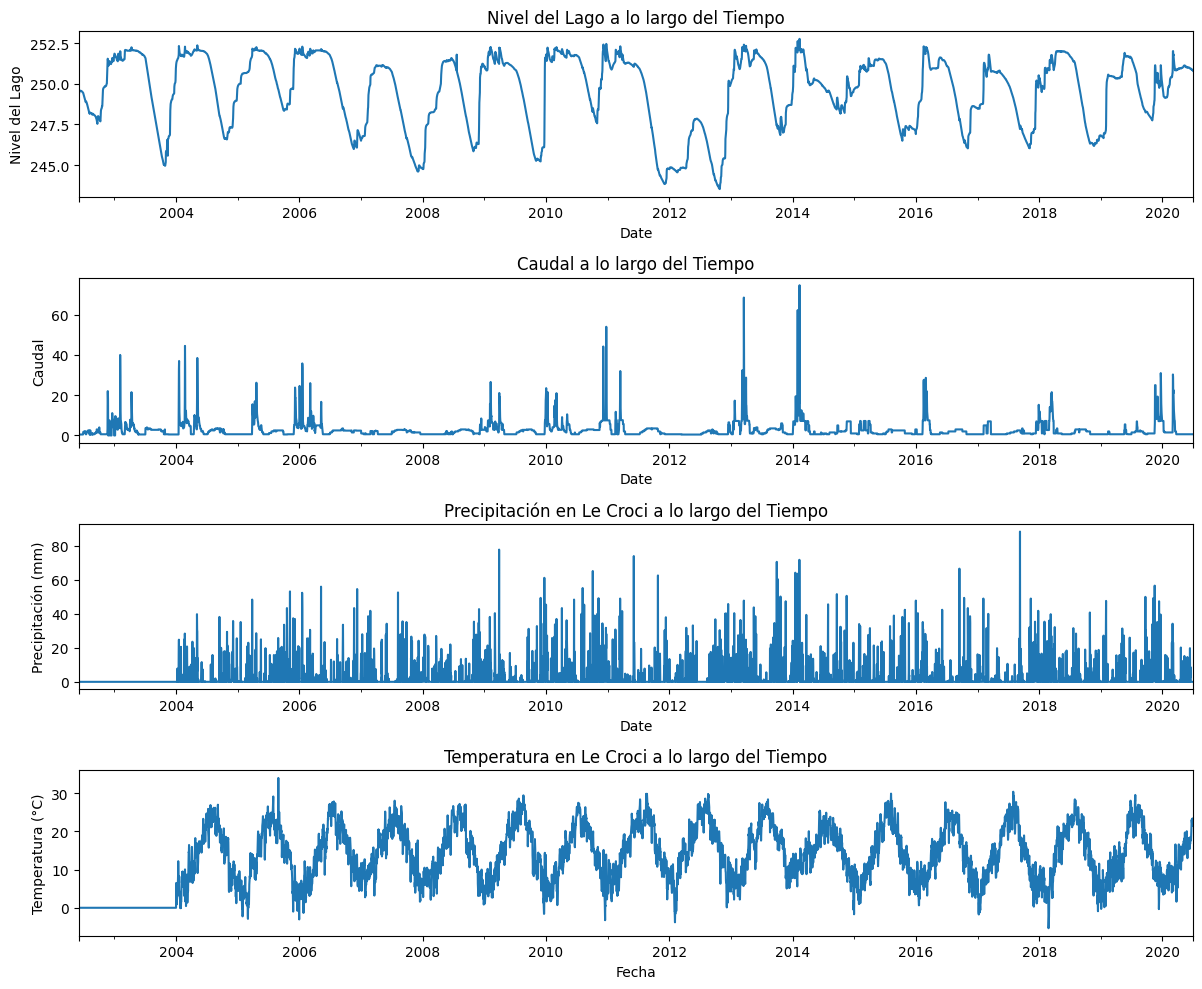

In [39]:
# Para ver patrones mostraremos una series temporales para 'Lake_Level', 'Flow_Rate'
# y las variables de 'Rainfall' y 'Temperature' más correlacionadas

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10))

df['Lake_Level'].plot(ax=axes[0], legend=False)
axes[0].set_title('Nivel del Lago a lo largo del Tiempo')
axes[0].set_ylabel('Nivel del Lago')

df['Flow_Rate'].plot(ax=axes[1], legend=False)
axes[1].set_title('Caudal a lo largo del Tiempo')
axes[1].set_ylabel('Caudal')

df['Rainfall_Le_Croci'].plot(ax=axes[2], legend=False)
axes[2].set_title('Precipitación en Le Croci a lo largo del Tiempo')
axes[2].set_ylabel('Precipitación (mm)')

df['Temperature_Le_Croci'].plot(ax=axes[3], legend=False)
axes[3].set_title('Temperatura en Le Croci a lo largo del Tiempo')
axes[3].set_ylabel('Temperatura (°C)')
axes[3].set_xlabel('Fecha')

plt.tight_layout()
plt.show()

###Identificación de Variables Importantes:

**Variables Clave para 'Lake_Level':**

1. Lake_Level es la variable objetivo principal. La correlación con 'Flow_Rate' (0.297) sugiere una relación moderada, donde el nivel del lago puede influir en el caudal de salida.

2. Flow_Rate tiene una correlación positiva moderada con 'Lake_Level' (0.297). Esto es lógico, ya que un mayor nivel de agua en el lago a menudo conduce a un mayor caudal de salida. Sin emabrgo, no es una causa directa del nivel, pero ambos se influyen mutuamente.

3. Las variables de Rainfall muestran que las correlaciones con 'Lake_Level' son muy bajas y cercanas a cero; significando que la precipitación diaria individual no tiene un impacto lineal fuerte e inmediato en el nivel del lago.

4. La variable Temperature_Le_Croci muestra una correlación baja con 'Lake_Level' de 0.044, lo que indica una relación lineal débil.

**Variables Clave para 'Flow_Rate':**

1.  **Flow_Rate** Es la variable objetivo y muestra patrones fluctuantes en su serie temporal.

2.  **Lake_Level** Presenta una correlación positiva moderada con 'Flow_Rate' (0.297). Un nivel de lago más alto tiende a estar asociado con un caudal de salida más alto, lo cual es esperable.

3.  **Las variables de Rainfall:** 'Rainfall_Le_Croci', tienen correlaciones positivas moderadas con 'Flow_Rate' (0.182). Esto indica que un aumento en la precipitación tiende a aumentar el caudal, lo que tiene sentido ya que la lluvia contribuye a la entrada de agua en el sistema y, por lo tanto, puede afectar el caudal de salida.

4.  **Temperature_Le_Croci:** Muestra una correlación negativa moderada con 'Flow_Rate' (-0.150). Esto sugiere que temperaturas más altas pueden estar asociadas con un caudal más bajo.

###CONCLUSION:

- Para predecir 'Lake_Level'; el 'Flow_Rate' es la variable con la correlación más significativa.

- Para predecir 'Flow_Rate'; el 'Lake_Level',variables de 'Rainfall' y la temperatura muestran relaciones más directas y lógicas que son relevantes para su pronóstico.

---
#### Se crearán lags* de las variables relacionadas para usar en el modelo ARIMA
#####*valores pasados de una variable para explicar su valor actual

#### Se justificará la seleccion de ellas mediante su relevancia para 'Lake_Level' y 'Flow_Rate'

In [40]:
target_columns = ['Lake_Level', 'Flow_Rate', 'Rainfall_Le_Croci', 'Temperature_Le_Croci']
# Lista de variables que consideramos importantes

# Bucle de variables con lags, para usarlas en el modelo autorregresivo
for col in target_columns:
    for i in range(1, 4): # Lags para 1,2 y 3 dias
        df[f'{col}_lag_{i}'] = df[col].shift(i)

df.head()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate,Lake_Level_lag_1,Lake_Level_lag_2,Lake_Level_lag_3,Flow_Rate_lag_1,Flow_Rate_lag_2,Flow_Rate_lag_3,Rainfall_Le_Croci_lag_1,Rainfall_Le_Croci_lag_2,Rainfall_Le_Croci_lag_3,Temperature_Le_Croci_lag_1,Temperature_Le_Croci_lag_2,Temperature_Le_Croci_lag_3
Date,,,,,,,,,,,,,,,,,,,,
2002-06-03,0.0,0.0,0.0,0.0,0.0,0.0,249.43,0.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-06-04,0.0,0.0,0.0,0.0,0.0,0.0,249.43,0.31,249.43,NaN,NaN,0.31,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
2002-06-05,0.0,0.0,0.0,0.0,0.0,0.0,249.43,0.31,249.43,249.43,NaN,0.31,0.31,NaN,0.0,0.0,NaN,0.0,0.0,NaN
2002-06-06,0.0,0.0,0.0,0.0,0.0,0.0,249.43,0.31,249.43,249.43,249.43,0.31,0.31,0.31,0.0,0.0,0.0,0.0,0.0,0.0
2002-06-07,0.0,0.0,0.0,0.0,0.0,0.0,249.44,0.31,249.43,249.43,249.43,0.31,0.31,0.31,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# Eliminamos las filas que contienen valores NaN de las variables con lags
df.dropna(inplace=True)
df.head()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate,Lake_Level_lag_1,Lake_Level_lag_2,Lake_Level_lag_3,Flow_Rate_lag_1,Flow_Rate_lag_2,Flow_Rate_lag_3,Rainfall_Le_Croci_lag_1,Rainfall_Le_Croci_lag_2,Rainfall_Le_Croci_lag_3,Temperature_Le_Croci_lag_1,Temperature_Le_Croci_lag_2,Temperature_Le_Croci_lag_3
Date,,,,,,,,,,,,,,,,,,,,
2002-06-06,0.0,0.0,0.0,0.0,0.0,0.0,249.43,0.31,249.43,249.43,249.43,0.31,0.31,0.31,0.0,0.0,0.0,0.0,0.0,0.0
2002-06-07,0.0,0.0,0.0,0.0,0.0,0.0,249.44,0.31,249.43,249.43,249.43,0.31,0.31,0.31,0.0,0.0,0.0,0.0,0.0,0.0
2002-06-08,0.0,0.0,0.0,0.0,0.0,0.0,249.56,0.38,249.44,249.43,249.43,0.31,0.31,0.31,0.0,0.0,0.0,0.0,0.0,0.0
2002-06-09,0.0,0.0,0.0,0.0,0.0,0.0,249.57,0.38,249.56,249.44,249.43,0.38,0.31,0.31,0.0,0.0,0.0,0.0,0.0,0.0
2002-06-10,0.0,0.0,0.0,0.0,0.0,0.0,249.58,0.48,249.57,249.56,249.44,0.38,0.38,0.31,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Preparamos los datos para ARIMA

split_index = int(len(df) * 0.8)

# Dividimos el DataFrame en conjuntos de train y test
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

# Definimos las variables objetivo (y) para ambos conjuntos
y_train = train_df[['Lake_Level', 'Flow_Rate']]
y_test = test_df[['Lake_Level', 'Flow_Rate']]

# Definimos las variables externas (exógenas) que parecen tener una influencia en las variables objetivo
# Excluimos las variables objetivo originales del conjunto de características.
exogenous_features = [col for col in df.columns if col not in ['Lake_Level', 'Flow_Rate']]

X_train = train_df[exogenous_features]
X_test = test_df[exogenous_features]

print(f"train size: {len(train_df)} filas")
print(f"test size: {len(test_df)} filas")
print(f"X_train cols: {X_train.columns.tolist()}")
print(f"Y_train cols: {y_train.columns.tolist()}")

train size: 5280 filas
test size: 1320 filas
X_train cols: ['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata', 'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci', 'Lake_Level_lag_1', 'Lake_Level_lag_2', 'Lake_Level_lag_3', 'Flow_Rate_lag_1', 'Flow_Rate_lag_2', 'Flow_Rate_lag_3', 'Rainfall_Le_Croci_lag_1', 'Rainfall_Le_Croci_lag_2', 'Rainfall_Le_Croci_lag_3', 'Temperature_Le_Croci_lag_1', 'Temperature_Le_Croci_lag_2', 'Temperature_Le_Croci_lag_3']
Y_train cols: ['Lake_Level', 'Flow_Rate']


###NOTA:

##### - Mi modelo ARIMA me mostró una predicción lineal no acorde con los datos reales. Por lo tanto, parece que dichos modelos tienden a ser más precisos para pronósticos a corto plazo y no a cierto número de años. Adicionalmente, a medida que el horizonte de predicción se alarga, la incertidumbre aumenta y el modelo a menudo converge hacia la media o hacia una tendencia lineal, especialmente si los datos no presentan una estacionalidad muy pronunciada o si las variables exógenas (externas) no proporcionan suficiente información sobre las fluctuaciones futuras.
-----------------------

##### - Se solucionó haciendo un remuestreo de datos, el cual era agrupar los datos a nivel mensual. En lugar de datos diarios, sume y promedié las mediciones para obtener series temporales mensuales. Esto redujo el valor de m (a 12 para mensual), haciendo que auto_arima fuese mucho más manejable y capaz de capturar la estacionalidad anual/mensual/semanal de forma más eficiente.

## Remuestreo de datos a Mensual

Para las columnas de 'Rainfall', se tomará la suma, mientras que para 'Lake_Level', 'Flow_Rate' y 'Temperature', se calculará la media para representar el promedio mensual. Esto creará un nuevo DataFrame con datos mensuales.


In [43]:
rainfall_cols = ['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata', 'Rainfall_Cavallina', 'Rainfall_Le_Croci']
other_cols_for_mean = ['Lake_Level', 'Flow_Rate', 'Temperature_Le_Croci']

agg_dict = {}
for col in rainfall_cols:
    agg_dict[col] = 'sum'
for col in other_cols_for_mean:
    agg_dict[col] = 'mean'

# Cree una copia del df original para evitar modificarlo directamente para la agregación mensual
# si se usa en otro lugar en su formato diario.
# El df original sigue siendo diario; y el que se usaba para las funciones de retraso
# ya se ha eliminado (NA).
df_original = df.copy()

# Remuestrear a frecuencia mensual, utilizando 'MS' para el inicio del mes
df_monthly = df_original.resample('MS').agg(agg_dict)

print("Monthly aggregated DataFrame:")
df_monthly.head()

Monthly aggregated DataFrame:


,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Lake_Level,Flow_Rate,Temperature_Le_Croci
Date,,,,,,,,
2002-06-01,0.0,0.0,0.0,0.0,0.0,249.524400,0.507200,0.0
2002-07-01,0.0,0.0,0.0,0.0,0.0,248.910323,1.712903,0.0
2002-08-01,0.0,0.0,0.0,0.0,0.0,248.186129,0.903226,0.0
2002-09-01,0.0,0.0,0.0,0.0,0.0,247.928333,1.513333,0.0
2002-10-01,0.0,0.0,0.0,0.0,0.0,248.592581,0.970968,0.0


## Crear Lags en Datos Mensuales

#### Generaré características de lag (para 1, 2 y 3 meses anteriores) para las variables clave ('Lake_Level', 'Flow_Rate', 'Rainfall_Le_Croci', 'Temperature_Le_Croci') en los datos mensuales remuestreados. Esto ayudará al modelo ARIMA a capturar las dependencias mensuales.


In [44]:
target_columns_monthly = ['Lake_Level', 'Flow_Rate', 'Rainfall_Le_Croci', 'Temperature_Le_Croci']

# Bucle para crear variables con lags para el modelo mensual
for col in target_columns_monthly:
    for i in range(1, 4): # Lags para 1, 2 y 3 meses
        df_monthly[f'{col}_lag_{i}'] = df_monthly[col].shift(i)

# Eliminamos las filas que contienen valores NaN de las variables con lags
df_monthly.dropna(inplace=True)

print("Monthly DataFrame with lagged features:")
df_monthly.head()

Monthly DataFrame with lagged features:


,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Lake_Level,Flow_Rate,Temperature_Le_Croci,Lake_Level_lag_1,Lake_Level_lag_2,Lake_Level_lag_3,Flow_Rate_lag_1,Flow_Rate_lag_2,Flow_Rate_lag_3,Rainfall_Le_Croci_lag_1,Rainfall_Le_Croci_lag_2,Rainfall_Le_Croci_lag_3,Temperature_Le_Croci_lag_1,Temperature_Le_Croci_lag_2,Temperature_Le_Croci_lag_3
Date,,,,,,,,,,,,,,,,,,,,
2002-09-01,0.0,0.0,0.0,0.0,0.0,247.928333,1.513333,0.0,248.186129,248.910323,249.524400,0.903226,1.712903,0.507200,0.0,0.0,0.0,0.0,0.0,0.0
2002-10-01,0.0,0.0,0.0,0.0,0.0,248.592581,0.970968,0.0,247.928333,248.186129,248.910323,1.513333,0.903226,1.712903,0.0,0.0,0.0,0.0,0.0,0.0
2002-11-01,0.0,0.0,0.0,0.0,0.0,250.414667,2.590000,0.0,248.592581,247.928333,248.186129,0.970968,1.513333,0.903226,0.0,0.0,0.0,0.0,0.0,0.0
2002-12-01,0.0,0.0,0.0,0.0,0.0,251.388710,4.587097,0.0,250.414667,248.592581,247.928333,2.590000,0.970968,1.513333,0.0,0.0,0.0,0.0,0.0,0.0
2003-01-01,0.0,0.0,0.0,0.0,0.0,251.646129,5.064516,0.0,251.388710,250.414667,248.592581,4.587097,2.590000,0.970968,0.0,0.0,0.0,0.0,0.0,0.0


**Preparacion de datos para el modelo**:

Dividimos el DataFrame mensual en conjuntos de entrenamiento y prueba para las variables objetivo ('Lake_Level', 'Flow_Rate') y las características exógenas, de forma similar a la preparación diaria de los datos.



In [45]:
split_index_monthly = int(len(df_monthly) * 0.8)

# Dividimos el DataFrame mensual en conjuntos de train y test
train_df_monthly = df_monthly.iloc[:split_index_monthly]
test_df_monthly = df_monthly.iloc[split_index_monthly:]

# Definimos las variables objetivo (y) para ambos conjuntos mensuales
y_train_monthly = train_df_monthly[['Lake_Level', 'Flow_Rate']]
y_test_monthly = test_df_monthly[['Lake_Level', 'Flow_Rate']]

# Definimos las variables externas (exógenas) para el conjunto mensual
exogenous_features_monthly = [col for col in df_monthly.columns if col not in ['Lake_Level', 'Flow_Rate']]

X_train_monthly = train_df_monthly[exogenous_features_monthly]
X_test_monthly = test_df_monthly[exogenous_features_monthly]

print(f"Monthly train size: {len(train_df_monthly)} filas")
print(f"Monthly test size: {len(test_df_monthly)} filas")
print(f"X_train_monthly cols: {X_train_monthly.columns.tolist()}")
print(f"Y_train_monthly cols: {y_train_monthly.columns.tolist()}")

Monthly train size: 171 filas
Monthly test size: 43 filas
X_train_monthly cols: ['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata', 'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci', 'Lake_Level_lag_1', 'Lake_Level_lag_2', 'Lake_Level_lag_3', 'Flow_Rate_lag_1', 'Flow_Rate_lag_2', 'Flow_Rate_lag_3', 'Rainfall_Le_Croci_lag_1', 'Rainfall_Le_Croci_lag_2', 'Rainfall_Le_Croci_lag_3', 'Temperature_Le_Croci_lag_1', 'Temperature_Le_Croci_lag_2', 'Temperature_Le_Croci_lag_3']
Y_train_monthly cols: ['Lake_Level', 'Flow_Rate']


**Entrenamos el modelo**:

#### Entrenaremos los modelos ARIMA para «Nivel del Lago» y «Tasa de Caudal» utilizando los datos de entrenamiento diarios, incorporando las características exógenas identificadas. Esto implica definir el orden ARIMA (p, d, q) y ajustar el modelo a las respectivas variables objetivo.



In [46]:
import pmdarima as pm

# Modelo ARIMA para 'Lake_Level' (diario)
print("Entrenando modelo ARIMA para Lake_Level (diario)...")
model_lake_level = pm.auto_arima(
    y=y_train['Lake_Level'],
    X=X_train, # Exógenas para el nivel del lago
    start_p=1, start_q=1,
    test='adf',
    max_p=5, max_q=5,
    m=1, # No estacionalidad para datos diarios en principio
    d=None, # Permitir que auto_arima determine d
    seasonal=False, # No estacional
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)
print("Modelo ARIMA para Lake_Level (diario) entrenado.")

print()

# Modelo ARIMA para 'Flow_Rate' (diario)
print("Entrenando modelo ARIMA para Flow_Rate (diario)...")
model_flow_rate = pm.auto_arima(
    y=y_train['Flow_Rate'],
    X=X_train, # Exógenas para el caudal
    start_p=1, start_q=1,
    test='adf',
    max_p=5, max_q=5,
    m=1,
    d=None,
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)
print("Modelo ARIMA para Flow_Rate (diario) entrenado.")


Entrenando modelo ARIMA para Lake_Level (diario)...
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-12443.206, Time=19.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-12425.306, Time=38.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-12443.557, Time=5.46 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-12444.440, Time=11.27 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-12447.062, Time=12.41 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-12456.460, Time=13.35 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-12454.461, Time=14.01 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-12456.335, Time=14.17 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-12455.540, Time=13.37 sec


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:1901: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:1908: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-12426.458, Time=12.40 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-12490.027, Time=30.47 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-12489.073, Time=19.45 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=-12478.859, Time=22.45 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-12446.778, Time=16.89 sec


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:1901: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:1908: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-12422.399, Time=14.20 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=-12477.330, Time=25.00 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-12487.934, Time=14.27 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 297.034 seconds
Modelo ARIMA para Lake_Level (diario) entrenado.

Entrenando modelo ARIMA para Flow_Rate (diario)...
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=23217.158, Time=5.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=23213.167, Time=15.61 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=23214.082, Time=4.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=23214.067, Time=5.56 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=23215.149, Time=4.51 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 35.132 seconds
Modelo ARIMA para Flow_Rate (diario) entrenado.


Entrenaremos los modelos ARIMA para «Nivel del Lago» y «Tasa de Caudal» utilizando los datos de entrenamiento mensuales, incorporando las características exógenas identificadas. Esto garantizará que se aborden ambas granularidades.



In [47]:
import pmdarima as pm

# Modelo ARIMA para 'Lake_Level' (mensual)
print("Entrenando modelo ARIMA para Lake_Level (mensual)...")
model_lake_level_monthly = pm.auto_arima(
    y=y_train_monthly['Lake_Level'],
    X=X_train_monthly, # Exógenas para el nivel del lago mensual
    start_p=1, start_q=1,
    test='adf',
    max_p=5, max_q=5,
    m=12, # Estacionalidad mensual
    d=None, # Permitir que auto_arima determine d
    seasonal=True, # Para datos mensuales, la estacionalidad suele ser importante
    stepwise=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)
print("Modelo ARIMA para Lake_Level (mensual) entrenado.")

print()

# Modelo ARIMA para 'Flow_Rate' (mensual)
print("Entrenando modelo ARIMA para Flow_Rate (mensual)...")
model_flow_rate_monthly = pm.auto_arima(
    y=y_train_monthly['Flow_Rate'],
    X=X_train_monthly, # Exógenas para el caudal mensual
    start_p=1, start_q=1,
    test='adf',
    max_p=5, max_q=5,
    m=12, # Estacionalidad mensual
    d=None,
    seasonal=True, # Para datos mensuales, la estacionalidad suele ser importante
    stepwise=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)
print("Modelo ARIMA para Flow_Rate (mensual) entrenado.")

Entrenando modelo ARIMA para Lake_Level (mensual)...
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=347.826, Time=3.86 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=340.449, Time=0.42 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=343.406, Time=1.82 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=343.757, Time=2.52 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=338.947, Time=1.52 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=342.449, Time=1.18 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=342.582, Time=1.86 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=344.518, Time=4.62 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=341.413, Time=1.33 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=341.462, Time=1.24 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=343.566, Time=0.84 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 21.225 seconds
Modelo ARIMA para Lake_Level (mensual) entrenado.

Entrenando modelo ARIMA para Flow_Rate (mensual)

####Predicciones:

 - Utilizando los modelos diarios y mensuales generaremos las predicciones.



In [48]:
# Predicciones de Lake_Level (diario)
predictions_lake_level = model_lake_level.predict(
    n_periods=len(X_test),
    X=X_test
)
predictions_lake_level = pd.Series(predictions_lake_level, index=X_test.index)
display(predictions_lake_level.head())

# Predicciones de Flow_Rate (diario)
predictions_flow_rate = model_flow_rate.predict(
    n_periods=len(X_test),
    X=X_test
)
predictions_flow_rate = pd.Series(predictions_flow_rate, index=X_test.index)
display(predictions_flow_rate.head())

# Predicciones de Lake_Level (mensual)
predictions_lake_level_monthly = model_lake_level_monthly.predict(
    n_periods=len(X_test_monthly),
    X=X_test_monthly
)
predictions_lake_level_monthly = pd.Series(predictions_lake_level_monthly, index=X_test_monthly.index)
display(predictions_lake_level_monthly.head())

# Predicciones de Flow_Rate (mensual)
predictions_flow_rate_monthly = model_flow_rate_monthly.predict(
    n_periods=len(X_test_monthly),
    X=X_test_monthly
)
predictions_flow_rate_monthly = pd.Series(predictions_flow_rate_monthly, index=X_test_monthly.index)
display(predictions_flow_rate_monthly.head())


,0
Date,
2016-11-19,247.258425
2016-11-20,247.625604
2016-11-21,248.484786
2016-11-22,248.551984
2016-11-23,248.468908


,0
Date,
2016-11-19,2.280185
2016-11-20,0.368870
2016-11-21,1.134529
2016-11-22,1.728544
2016-11-23,0.965696


,0
Date,
2016-12-01,248.819964
2017-01-01,248.890105
2017-02-01,249.645916
2017-03-01,251.883530
2017-04-01,250.745558


,0
Date,
2016-12-01,0.746511
2017-01-01,2.158772
2017-02-01,2.877258
2017-03-01,4.387542
2017-04-01,4.232541


####Evaluacion:

- Evaluaremos su rendimiento calculando métricas clave como MAE, MSE y RMSE para el nivel del lago y el caudal.


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Evaluacion de modelos diarios:")
# Lake_Level diario
mae_lake_level = mean_absolute_error(y_test['Lake_Level'], predictions_lake_level)
mse_lake_level = mean_squared_error(y_test['Lake_Level'], predictions_lake_level)
rmse_lake_level = np.sqrt(mse_lake_level)
print(f"Lake_Level (Diario) - MAE: {mae_lake_level:.3f}, MSE: {mse_lake_level:.3f}, RMSE: {rmse_lake_level:.3f}")

# Flow_Rate diario
mae_flow_rate = mean_absolute_error(y_test['Flow_Rate'], predictions_flow_rate)
mse_flow_rate = mean_squared_error(y_test['Flow_Rate'], predictions_flow_rate)
rmse_flow_rate = np.sqrt(mse_flow_rate)
print(f"Flow_Rate (Diario) - MAE: {mae_flow_rate:.3f}, MSE: {mse_flow_rate:.3f}, RMSE: {rmse_flow_rate:.3f}")

print("\nEvaluando modelos mensuales:")
# Lake_Level mensual
mae_lake_level_monthly = mean_absolute_error(y_test_monthly['Lake_Level'], predictions_lake_level_monthly)
mse_lake_level_monthly = mean_squared_error(y_test_monthly['Lake_Level'], predictions_lake_level_monthly)
rmse_lake_level_monthly = np.sqrt(mse_lake_level_monthly)
print(f"Lake_Level (Mensual) - MAE: {mae_lake_level_monthly:.3f}, MSE: {mse_lake_level_monthly:.3f}, RMSE: {rmse_lake_level_monthly:.3f}")

# Flow_Rate mensual
mae_flow_rate_monthly = mean_absolute_error(y_test_monthly['Flow_Rate'], predictions_flow_rate_monthly)
mse_flow_rate_monthly = mean_squared_error(y_test_monthly['Flow_Rate'], predictions_flow_rate_monthly)
rmse_flow_rate_monthly = np.sqrt(mse_flow_rate_monthly)
print(f"Flow_Rate (Mensual) - MAE: {mae_flow_rate_monthly:.3f}, MSE: {mse_flow_rate_monthly:.3f}, RMSE: {rmse_flow_rate_monthly:.3f}")


Evaluacion de modelos diarios:
Lake_Level (Diario) - MAE: 0.042, MSE: 0.009, RMSE: 0.097
Flow_Rate (Diario) - MAE: 0.630, MSE: 2.200, RMSE: 1.483

Evaluando modelos mensuales:
Lake_Level (Mensual) - MAE: 0.460, MSE: 0.434, RMSE: 0.659
Flow_Rate (Mensual) - MAE: 1.585, MSE: 4.934, RMSE: 2.221


###Comparacion:

- Analizamos los residuos del modelo calculando los residuos de cada uno de los cuatro modelos (diarios/mensuales de "Lake_level" y "Flow_rate") restando las predicciones de los valores de prueba reales. Esto nos servirá para evaluar la calidad y validez del modelo.



In [50]:
residuals_lake_level = y_test['Lake_Level'] - predictions_lake_level
residuals_flow_rate = y_test['Flow_Rate'] - predictions_flow_rate

residuals_lake_level_monthly = y_test_monthly['Lake_Level'] - predictions_lake_level_monthly
residuals_flow_rate_monthly = y_test_monthly['Flow_Rate'] - predictions_flow_rate_monthly

###Visualizacion:

- Revisar sus distribuciones para evaluar su rendimiento. Comprobando si se distribuyen normalmente alrededor de cero.



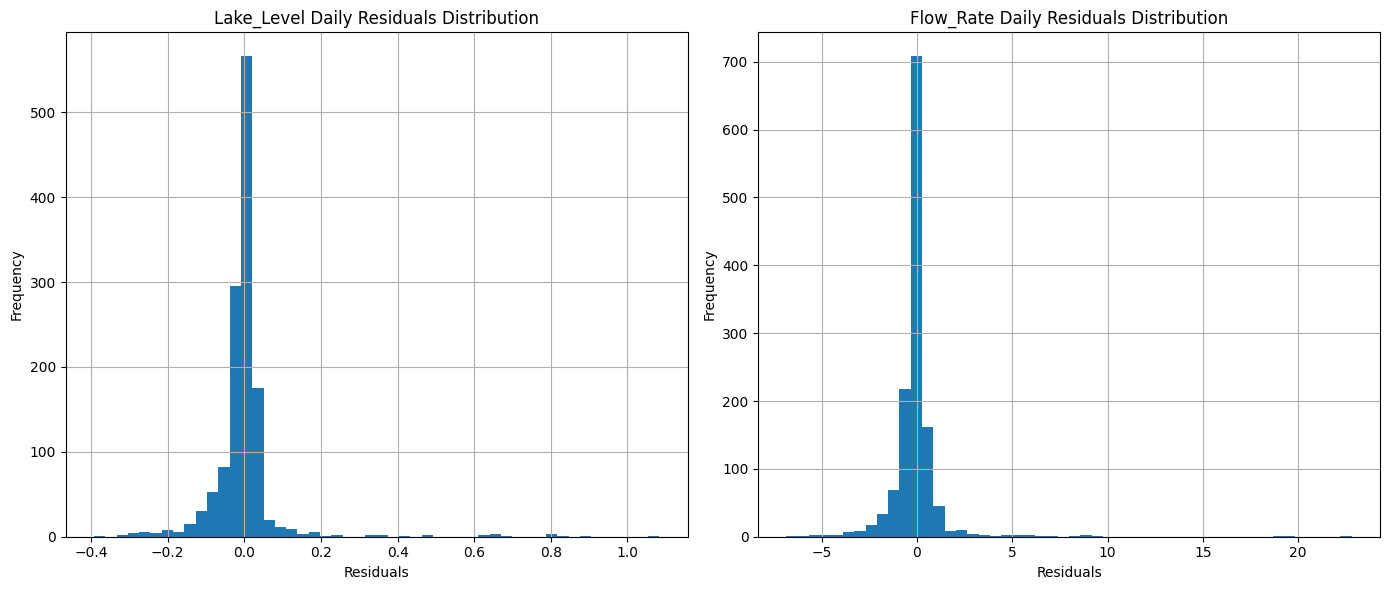

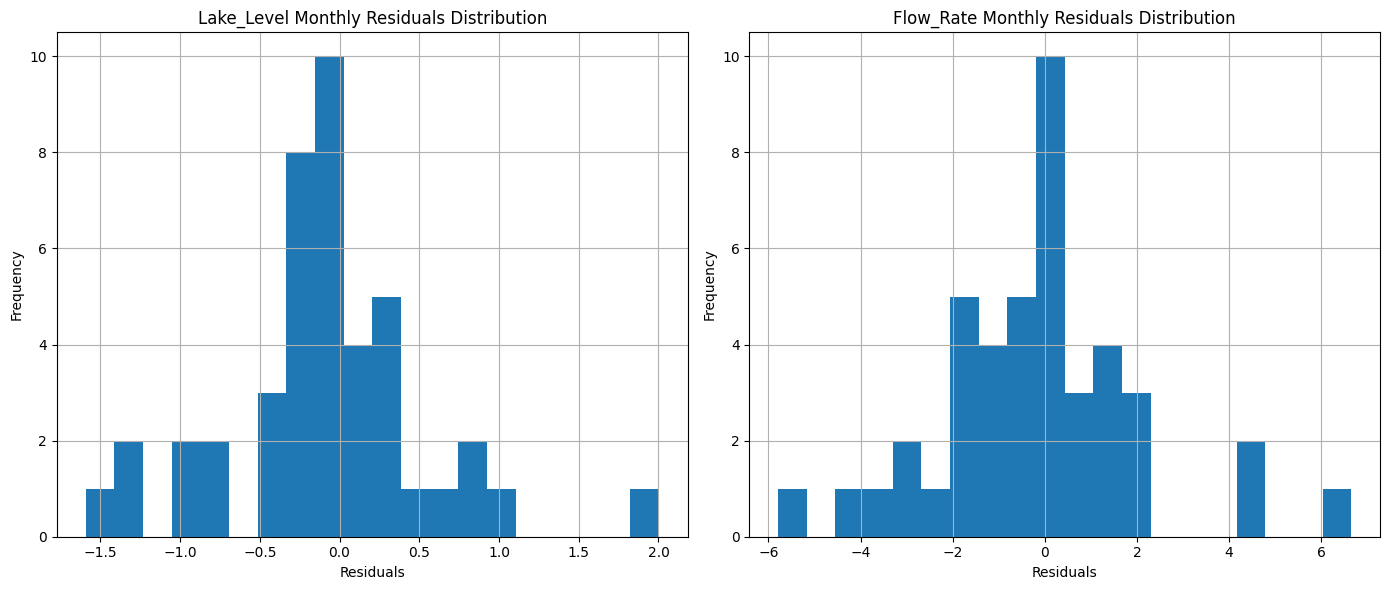

In [51]:
import matplotlib.pyplot as plt

# Histogramas de residuales diarios
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
residuals_lake_level.hist(bins=50)
plt.title('Lake_Level Daily Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
residuals_flow_rate.hist(bins=50)
plt.title('Flow_Rate Daily Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Histogramas de residuales mensuales
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
residuals_lake_level_monthly.hist(bins=20)
plt.title('Lake_Level Monthly Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
residuals_flow_rate_monthly.hist(bins=20)
plt.title('Flow_Rate Monthly Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Comparación de Rendimiento:
Predicciones Diarias vs. Mensuales

**'Lake_Level':**

*   Modelos Diarios:
    *   MAE: 0.042
    *   MSE: 0.009
    *   RMSE: 0.097
    *   La distribución de los residuales diarios para 'Lake_Level' parece bastante centrada alrededor de cero, con una varianza pequeña, lo que indica que el modelo diario captura bien las fluctuaciones finas del nivel del lago.

*   Modelos Mensuales:
    *   MAE: 0.460
    *   MSE: 0.434
    *   RMSE: 0.659
    *   La distribución de los residuales mensuales para 'Lake_Level' también está centrada alrededor de cero, pero con una mayor dispersión en comparación con los residuales diarios. Esto es esperable, ya que las agregaciones mensuales suavizan los datos y pueden introducir errores mayores al intentar predecir el promedio de un mes.

Conclusión para 'Lake_Level':

- El modelo diario para 'Lake_Level' muestra métricas de error significativamente más bajas (MAE, MSE, RMSE) en comparación con el modelo mensual.

- Esto sugiere que para la predicción del nivel del lago, un modelo diario es mucho más preciso y efectivo para capturar los cambios y patrones finos de la serie temporal.

- La mayor granularidad de los datos diarios permite al modelo aprender de fluctuaciones más detalladas, resultando en predicciones más ajustadas a los valores reales.

---

**'Flow_Rate'**:

*   Modelos Diarios:
    *   MAE: 0.630
    *   MSE: 2.200
    *   RMSE: 1.483
    *   La distribución de los residuales diarios para 'Flow_Rate' está centrada alrededor de cero, pero muestra una cola más larga o una dispersión mayor en comparación con 'Lake_Level', lo que podría indicar que el caudal es más volátil y difícil de predecir con alta precisión diaria.

*   Modelos Mensuales:
    *   MAE: 1.585
    *   MSE: 4.934
    *   RMSE: 2.221
    *   Los residuales mensuales para 'Flow_Rate' también están centrados en cero, pero con una dispersión aún mayor que los residuales diarios y los residuales mensuales de 'Lake_Level'. Esto refuerza la idea de que el caudal es una variable más compleja y con mayor variabilidad.

Conclusión para 'Flow_Rate':

- Similar a 'Lake_Level', el modelo diario para 'Flow_Rate' presenta métricas de error considerablemente menores que el modelo mensual.
- Aunque el 'Flow_Rate' parece inherentemente más difícil de predecir con alta exactitud que el 'Lake_Level' (evidenciado por mayores RMSE en ambos casos), la granularidad diaria sigue proporcionando un mejor rendimiento predictivo.
- La agregación mensual, al promediar las fluctuaciones diarias, pierde información importante para predecir el comportamiento dinámico del caudal.

---

Conclusión General:

- En ambos casos ('Lake_Level' y 'Flow_Rate'), los modelos entrenados con datos diarios superan a sus contrapartes mensuales en términos de precisión (menores MAE, MSE, RMSE).

- Esto indica que para la predicción de estas variables en este contexto, la granularidad diaria de los datos es crucial para capturar las dinámicas y patrones subyacentes de manera más efectiva. Si bien los modelos mensuales pueden ser útiles para pronósticos a muy largo plazo o para análisis de tendencias más amplias, para predicciones más detalladas y precisas en el corto y mediano plazo, los modelos diarios son preferibles.

## Analizar Residuos de 'Lake_Level' (Mensual)

- Graficamos la función de autocorrelación (ACF) de los residuos del modelo de 'Lake_Level' mensual para saber si el modelo tiene todos los patrones temporales de manera efectiva.


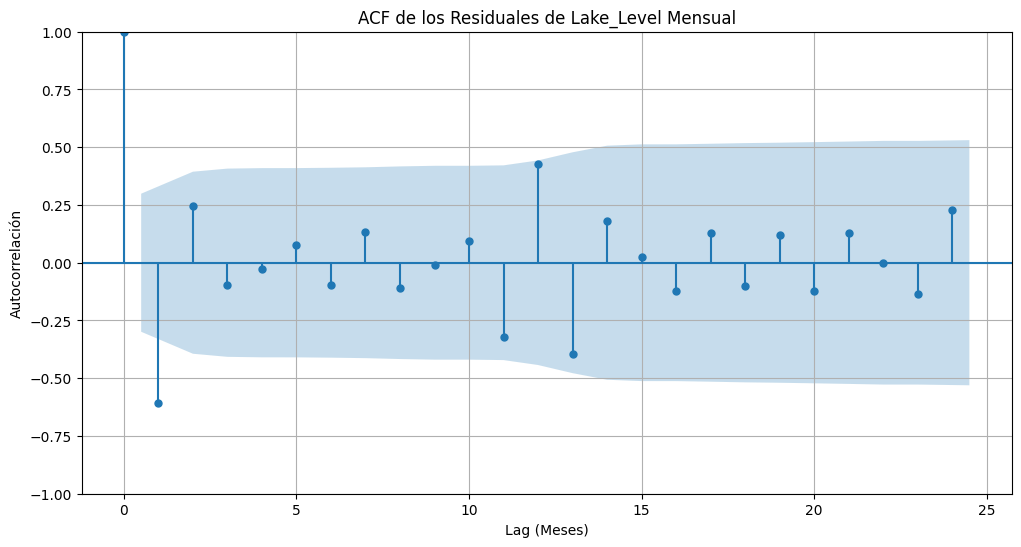

In [59]:
from statsmodels.graphics.tsaplots import plot_acf

# Crear una figura y un eje para el gráfico de ACF
plt.figure(figsize=(12, 6))
plot_acf(residuals_lake_level_monthly, lags=24, ax=plt.gca(), title='ACF de los Residuales de Lake_Level Mensual')
plt.xlabel('Lag (Meses)')
plt.ylabel('Autocorrelación')
plt.grid(True)
plt.show()

Ahora, para analizar si el modelo ARIMA mensual "Flow_Rate" ha capturado todos los patrones temporales, graficaré la Función de Autocorrelación (ACF) de sus residuos.

- Si existe una autocorrelación significativa, esto sugiere que el modelo podría mejorarse.




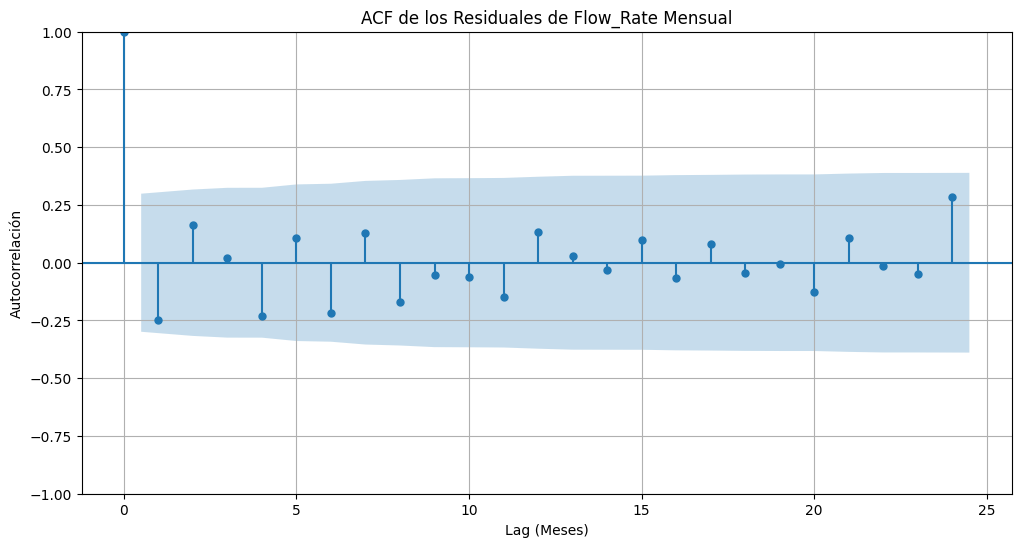

In [60]:
from statsmodels.graphics.tsaplots import plot_acf

# Crear una figura y un eje para el gráfico de ACF
plt.figure(figsize=(12, 6))
plot_acf(residuals_flow_rate_monthly, lags=24, ax=plt.gca(), title='ACF de los Residuales de Flow_Rate Mensual')
plt.xlabel('Lag (Meses)')
plt.ylabel('Autocorrelación')
plt.grid(True)
plt.show()

Si existe una autocorrelación significativa en los residuales del modelo mensual para el Flow_Rate.

## Entrenar y Evaluar ARIMA de 'Lake_Level' (Mensual)

Visualizar las predicciones del modelo ARIMA mensual para 'Lake_Level' frente a los valores reales del conjunto de prueba.


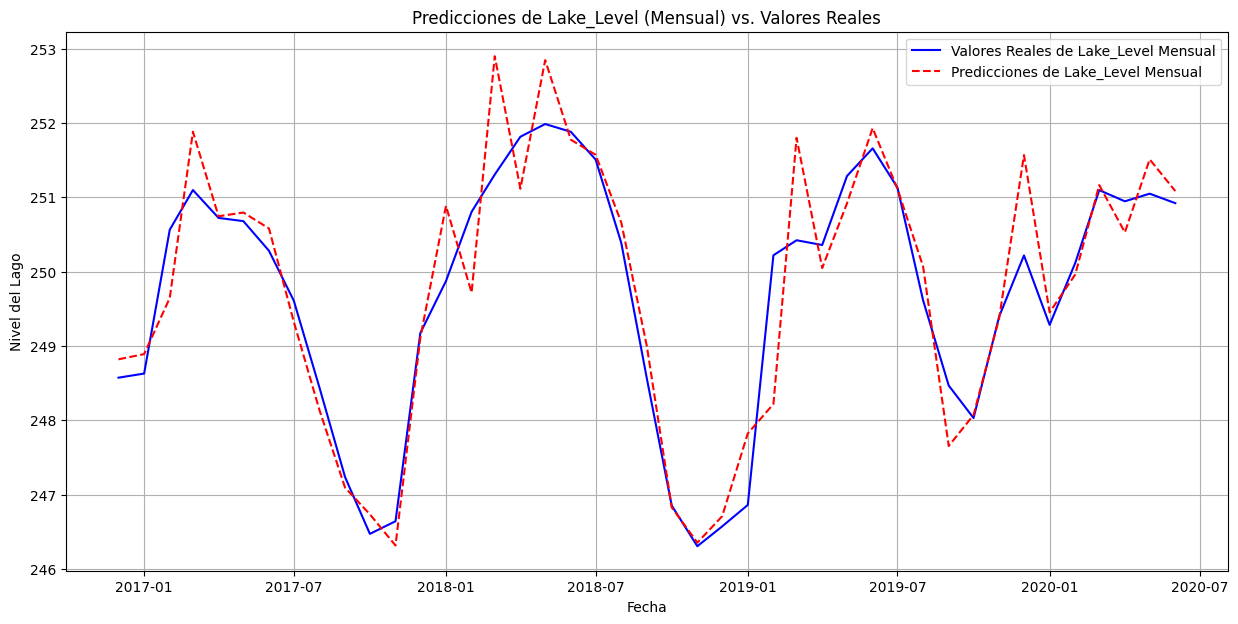

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(y_test_monthly['Lake_Level'], label='Valores Reales de Lake_Level Mensual', color='blue')
plt.plot(predictions_lake_level_monthly, label='Predicciones de Lake_Level Mensual', color='red', linestyle='--')
plt.title('Predicciones de Lake_Level (Mensual) vs. Valores Reales')
plt.xlabel('Fecha')
plt.ylabel('Nivel del Lago')
plt.legend()
plt.grid(True)
plt.show()

Ahora se necesitan visualizar las predicciones mensuales de "Flow_Rate" con respecto a los valores reales del conjunto de prueba, como se hizo anteriormente para "Lake_Level". Esto se hará representando gráficamente ambas series.



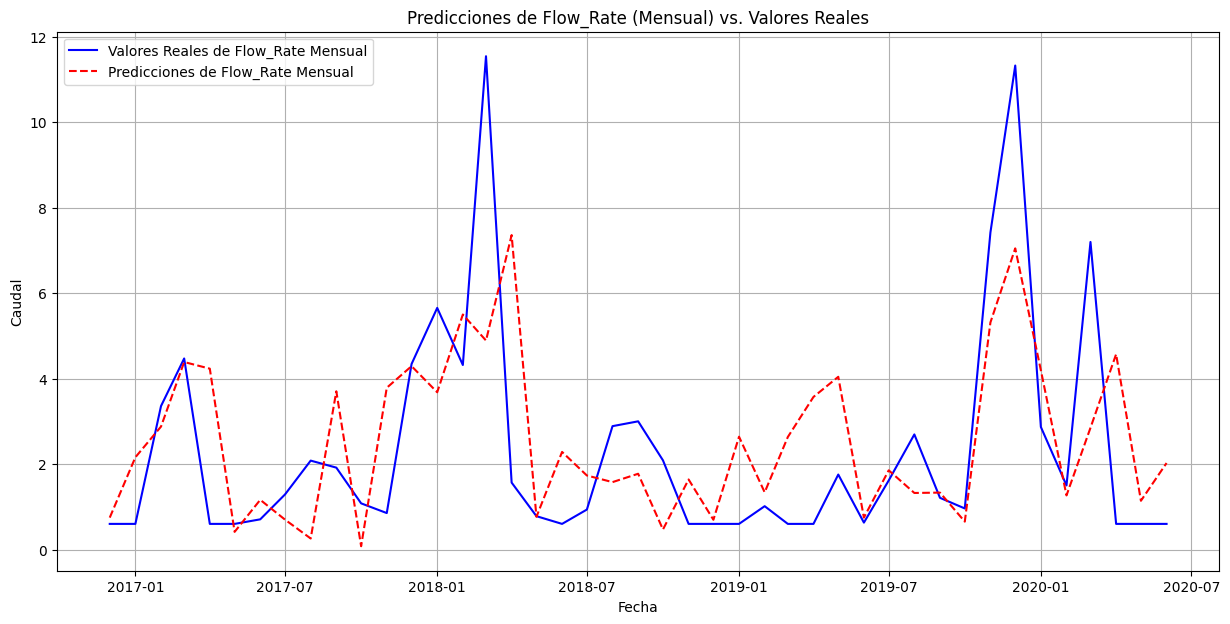

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(y_test_monthly['Flow_Rate'], label='Valores Reales de Flow_Rate Mensual', color='blue')
plt.plot(predictions_flow_rate_monthly, label='Predicciones de Flow_Rate Mensual', color='red', linestyle='--')
plt.title('Predicciones de Flow_Rate (Mensual) vs. Valores Reales')
plt.xlabel('Fecha')
plt.ylabel('Caudal')
plt.legend()
plt.grid(True)
plt.show()

## Analizando Residuos de 'Flow_Rate' (Mensual)

Graficar los residuos del modelo de 'Flow_Rate' a lo largo del tiempo para evaluar si el modelo ha capturado todos los patrones temporales de manera efectiva.


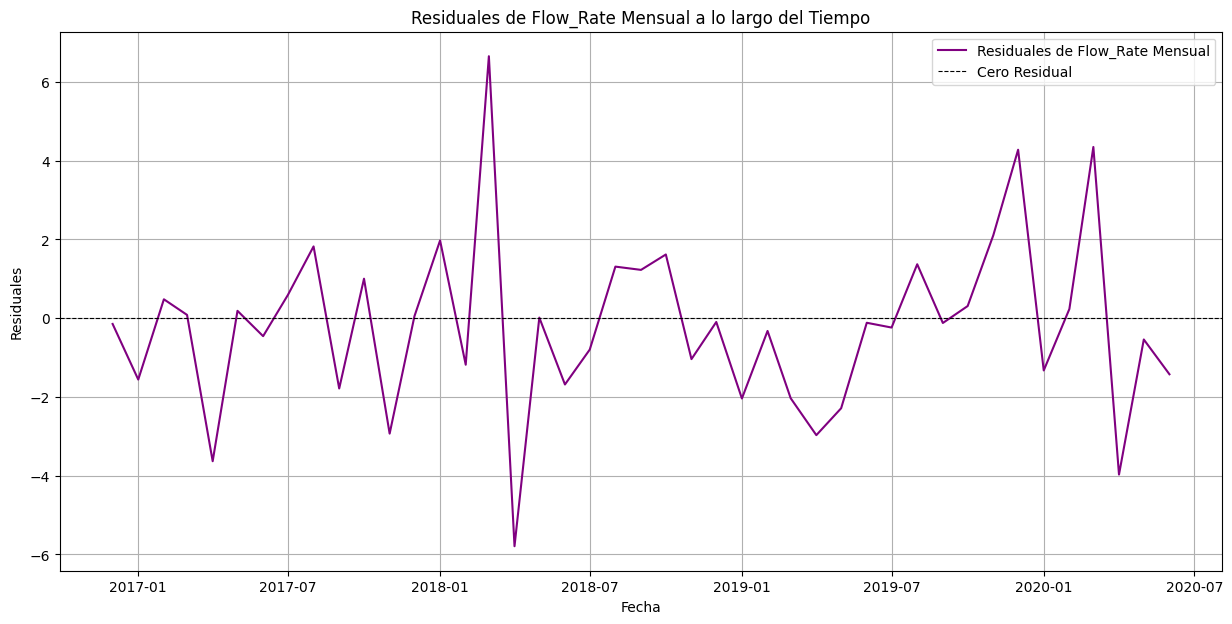

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(residuals_flow_rate_monthly, label='Residuales de Flow_Rate Mensual', color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8, label='Cero Residual')
plt.title('Residuales de Flow_Rate Mensual a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Residuales')
plt.legend()
plt.grid(True)
plt.show()

**Estabilidad de la Predicción y Análisis de Residuo:**
* Los histogramas de residuos de los modelos diarios mostraron distribuciones estrechamente centradas en cero con una pequeña varianza, lo que indica predicciones estables y precisas.
* Por el contrario, los histogramas de residuos de los modelos mensuales mostraron una mayor dispersión en torno a cero tanto para 'Lake_level' como para 'Flow_rate', lo que sugiere predicciones menos estables y precisas.
* Se generaron gráficos de Función de Autocorrelación (ACF) para los residuos del modelo mensual con el fin de evaluar cualquier patrón temporal no capturado.


-------
Graficamos un pronostico a futuro con base a los datos procesados:

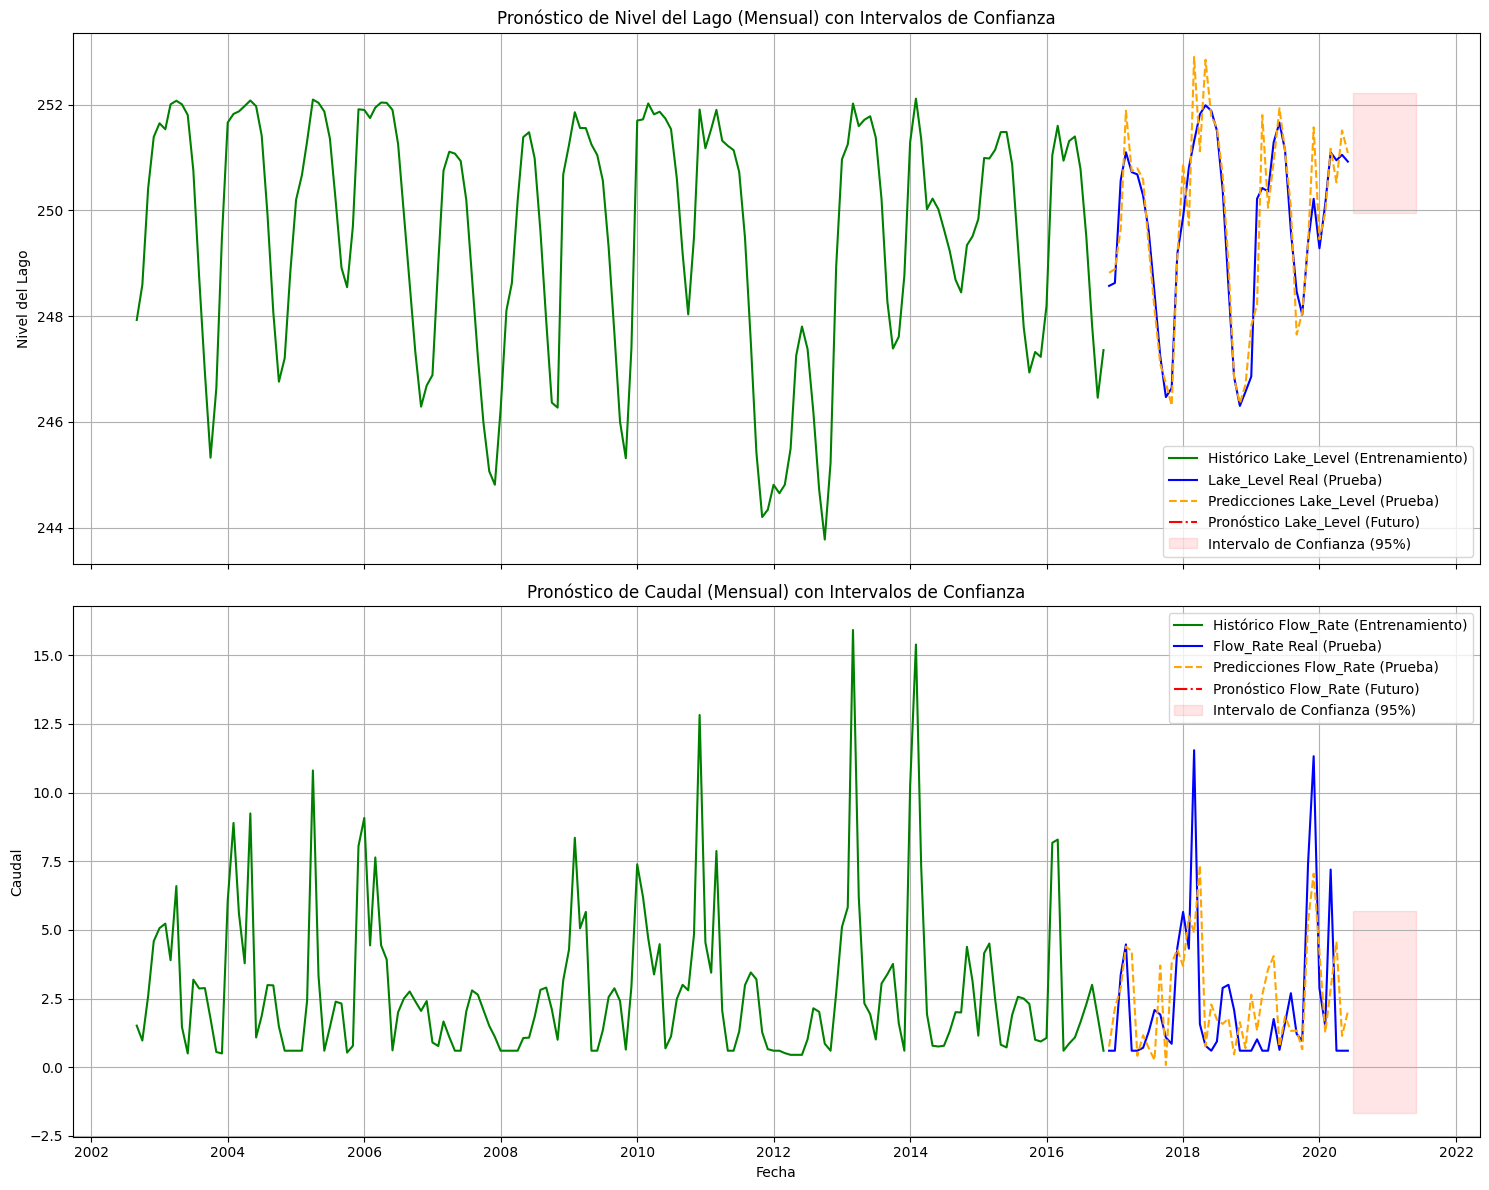

In [57]:
# Horizonte de 1 año en el pronóstico
forecast_horizon = 12

# Ultima fecha del DataFrame mensual
last_date_monthly = df_monthly.index[-1]

# Generamos fechas futuras
# Empezamos después de la última fecha existente
future_dates = pd.date_range(start=last_date_monthly, periods=forecast_horizon + 1, freq='MS')[1:]

# Creamos variables exógenas futuras
# Extendemos la última fila de X_test_monthly para todo el horizonte
# Suposición!!!
last_X_test_monthly_row = X_test_monthly.iloc[-1].to_frame().T
future_exog_monthly = pd.concat([last_X_test_monthly_row]*forecast_horizon, ignore_index=True)
future_exog_monthly.index = future_dates
# Orden igual al de las columnas en X_test_monthly
future_exog_monthly = future_exog_monthly[X_test_monthly.columns]


# Predicciones futuras para 'Lake_Level' (mensual) con intervalos de confianza
predictions_lake_level_monthly_future, conf_int_lake_level = model_lake_level_monthly.predict(
    n_periods=forecast_horizon,
    X=future_exog_monthly,
    return_conf_int=True
)
predictions_lake_level_monthly_future = pd.Series(predictions_lake_level_monthly_future, index=future_dates)
conf_int_lake_level = pd.DataFrame(conf_int_lake_level, index=future_dates, columns=['lower', 'upper'])


# Predicciones futuras para 'Flow_Rate' (mensual) con intervalos de confianza
predictions_flow_rate_monthly_future, conf_int_flow_rate = model_flow_rate_monthly.predict(
    n_periods=forecast_horizon,
    X=future_exog_monthly,
    return_conf_int=True
)
predictions_flow_rate_monthly_future = pd.Series(predictions_flow_rate_monthly_future, index=future_dates)
conf_int_flow_rate = pd.DataFrame(conf_int_flow_rate, index=future_dates, columns=['lower', 'upper'])


# Graficamos
fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# 'Lake_Level'
axes[0].plot(y_train_monthly['Lake_Level'], label='Histórico Lake_Level (Entrenamiento)', color='green')
axes[0].plot(y_test_monthly['Lake_Level'], label='Lake_Level Real (Prueba)', color='blue')
axes[0].plot(predictions_lake_level_monthly, label='Predicciones Lake_Level (Prueba)', color='orange', linestyle='--')
axes[0].plot(predictions_lake_level_monthly_future, label='Pronóstico Lake_Level (Futuro)', color='red', linestyle='-.')
axes[0].fill_between(conf_int_lake_level.index,
                     conf_int_lake_level['lower'],
                     conf_int_lake_level['upper'], color='red', alpha=0.1, label='Intervalo de Confianza (95%)')
axes[0].set_title('Pronóstico de Nivel del Lago (Mensual) con Intervalos de Confianza')
axes[0].set_ylabel('Nivel del Lago')
axes[0].legend()
axes[0].grid(True)

# 'Flow_Rate'
axes[1].plot(y_train_monthly['Flow_Rate'], label='Histórico Flow_Rate (Entrenamiento)', color='green')
axes[1].plot(y_test_monthly['Flow_Rate'], label='Flow_Rate Real (Prueba)', color='blue')
axes[1].plot(predictions_flow_rate_monthly, label='Predicciones Flow_Rate (Prueba)', color='orange', linestyle='--')
axes[1].plot(predictions_flow_rate_monthly_future, label='Pronóstico Flow_Rate (Futuro)', color='red', linestyle='-.')
axes[1].fill_between(conf_int_flow_rate.index,
                     conf_int_flow_rate['lower'],
                     conf_int_flow_rate['upper'], color='red', alpha=0.1, label='Intervalo de Confianza (95%)')
axes[1].set_title('Pronóstico de Caudal (Mensual) con Intervalos de Confianza')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Caudal')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Explicación de la Gráfica de Pronósticos Futuros:

*   **Datos históricos de entrenamiento (verde):** Representa el comportamiento pasado del nivel del lago y el caudal.
*   **Valores reales de prueba (azul):** Son los datos utilizados para evaluar los modelos.
*   **Predicciones del modelo para el periodo de prueba (naranja discontinua):** Muestra cómo el modelo se ajustó a los datos conocidos.
*   **Pronóstico futuro (rojo discontinua):** Son las predicciones a 12 meses vista, indicando una posible evolución futura.
*   **Intervalo de confianza (sombreado rojo tenue):** Esta área define el rango dentro del cual se espera que caigan los valores reales con una probabilidad del 95%. Un intervalo más ancho sugiere mayor incertidumbre en el pronóstico.

**Observaciones clave:**

*   Para **'Lake_Level'**, el pronóstico futuro (línea roja discontinua) se mantiene relativamente estable. El intervalo de confianza se ensancha gradualmente, lo cual es natural a medida que el horizonte de predicción se extiende. Esto sugiere que, bajo las suposiciones de las variables exógenas (últimos valores conocidos), el nivel del lago no mostraría cambios drásticos en el próximo año.

*   Para **'Flow_Rate'**, la línea de pronóstico futuro también es constante, pero el intervalo de confianza es notablemente amplio. Esto confirma que el caudal es una variable más volátil y compleja de predecir con alta precisión, y que las proyecciones futuras conllevan una mayor incertidumbre. La naturaleza plana del pronóstico, con intervalos de confianza que incluso incluyen valores negativos, indica que el modelo mensual, al mantener constantes las variables exógenas, no logra capturar una tendencia o estacionalidad significativa para el futuro.
-------

- NOTA:

Esta gráfica ofrece una visión general de las tendencias futuras, pero es crucial recordar que la precisión del pronóstico futuro depende significativamente de la validez de la suposición de que las variables exógenas (como lluvia o temperatura) se mantendrán como sus últimos valores observados.

Para pronósticos más fiables, se necesita contar con proyecciones futuras para estas variables exógenas.